# Matplotlib fundamentals

In [15]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## EDA - Exploratory data analysis

In [17]:
df.shape # long table

(4377, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [23]:
df.head(10)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [39]:
import duckdb

df_quantity_brand = duckdb.query("""
    SELECT 
        make AS Brand,
        sum(quantity) AS Quantity
    FROM df
    GROUP BY
        make
    ORDER BY quantity
    DESC
""").df()

df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar chart

<Axes: xlabel='Brand'>

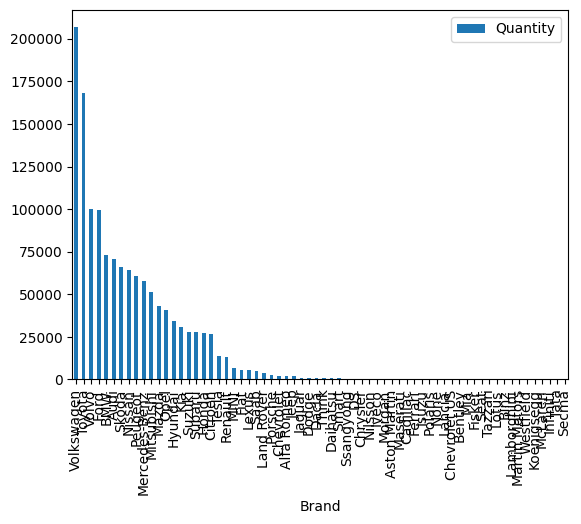

In [44]:
df_quantity_brand.plot(kind="bar", x="Brand", y="Quantity")

### plot top 5 most popular brands

<Axes: xlabel='Brand'>

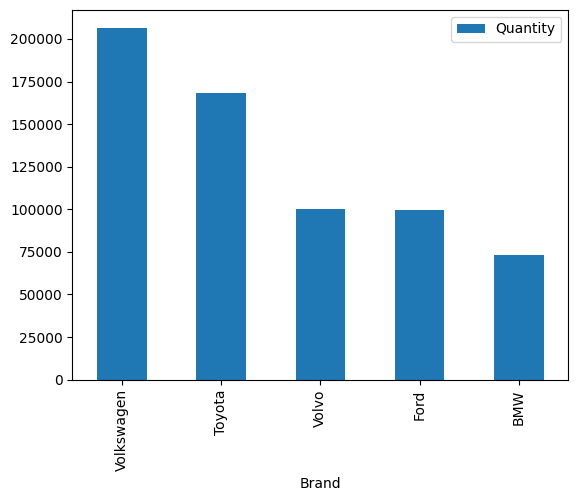

In [45]:
df_quantity_brand.head().plot(kind="bar", x="Brand", y="Quantity")

<Axes: xlabel='Brand'>

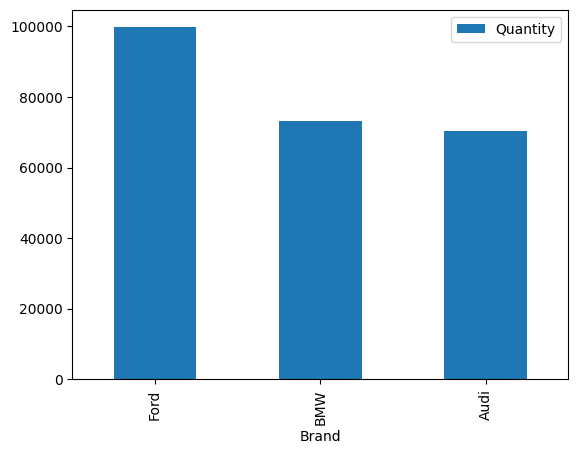

In [46]:
df_quantity_brand.iloc[3:6].plot(kind="bar", x="Brand", y="Quantity")

## Matplotlib bar

<BarContainer object of 10 artists>

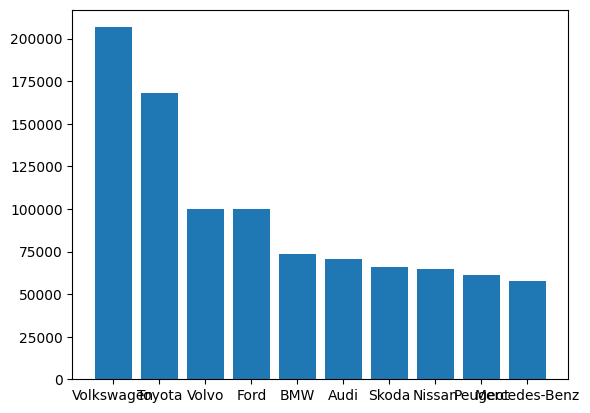

In [52]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots()

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"]
)

In [61]:
df_quantity_brand_top10["Quantity"]

0    206669.0
1    168177.0
2     99937.0
3     99713.0
4     73315.0
5     70475.0
6     66007.0
7     64535.0
8     61033.0
9     57557.0
Name: Quantity, dtype: float64

<BarContainer object of 10 artists>

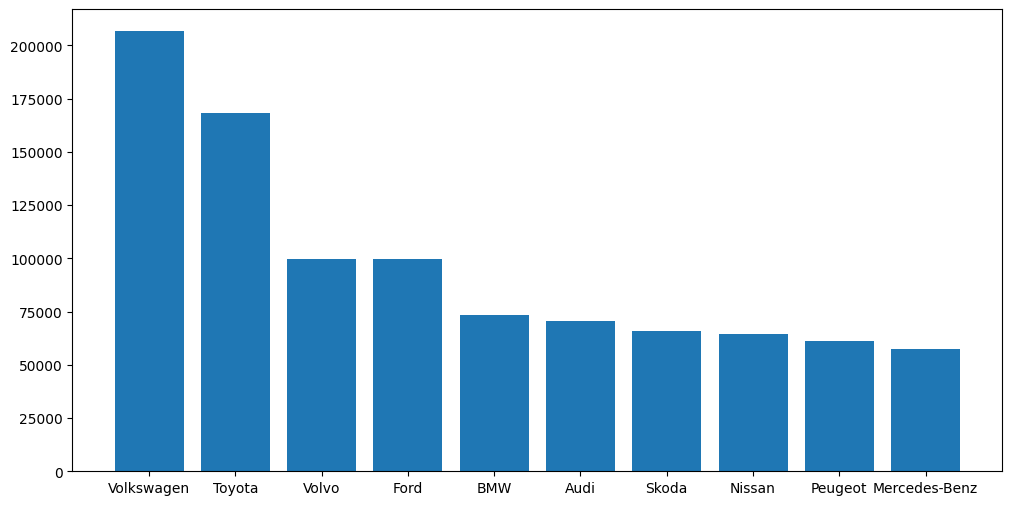

In [53]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"]
)

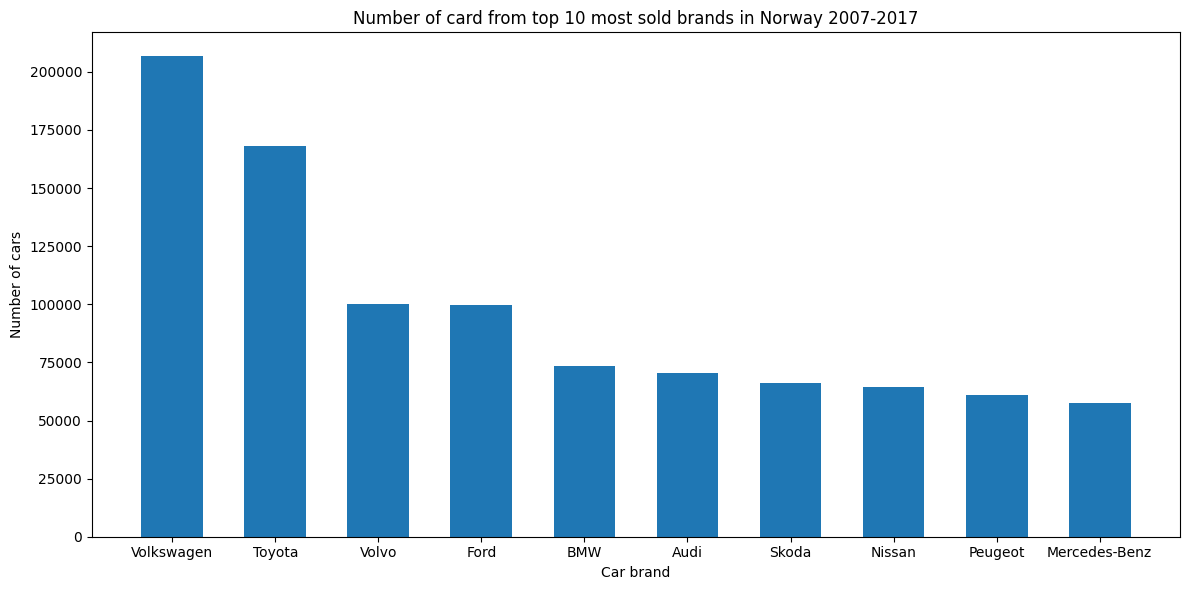

In [60]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"],
    width = 0.6
)

ax.set(
    title= "Number of card from top 10 most sold brands in Norway 2007-2017",
    xlabel="Car brand", 
    ylabel="Number of cars"
)

fig.tight_layout()

fig.savefig("figures/bars_top_10_cars.png")

## Line chart


In [62]:
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [70]:
df_quantity_year = duckdb.query("""
    SELECT 
        year,
        SUM(quantity) AS Quantity
    FROM 
        df
    GROUP BY
        year
    ORDER BY 
        year
""").df().set_index("Year")

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

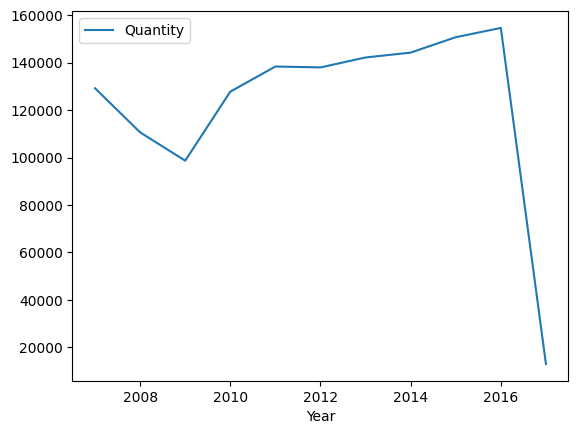

In [71]:
df_quantity_year.plot()

In [72]:
df.tail()

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


<Axes: xlabel='Year'>

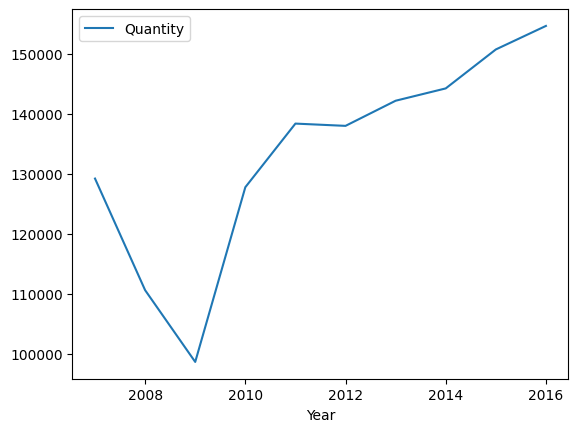

In [73]:
df_quantity_year.iloc[:-1].plot()

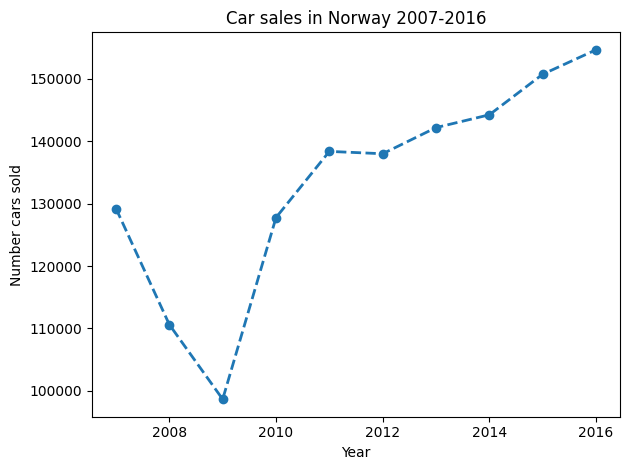

In [97]:
ax = df_quantity_year.iloc[:-1].plot(
    title = "Car sales in Norway 2007-2016", 
    xlabel = "Year", 
    ylabel = "Number cars sold",
    style = "--o",
    linewidth = 2,
)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")